# Data Visualization

The mathematician Richard Hamming once said, “The purpose of computing is insight, not numbers,” and the best way to develop insight is often to visualize data. Visualization deserves an entire lecture of its own, but we can explore a few features of Python’s `matplotlib` library here. While there is no official plotting library, `matplotlib` is the de facto standard.

In this notebook. We will walk through a pair of experiments and you will be tasked with generating the figures to represent the findings of these projects.

## Experiment 1a: 

The firing rate of a neuron—how many spikes it produces per second—can be influenced by different substances.

In this experiment, we examine how four different conditions affect a neuron’s firing rate:

1.	Control – The neuron is in a normal state, with no drugs applied.
2.	Anesthetic – A substance that suppresses neural activity, reducing the firing rate.
3.	Caffeine – A stimulant that increases neural excitability.
4.	Cocaine – A drug that strongly enhances neural activity.

Our goal is to visualize and compare the firing rates under these conditions using a box plot in matplotlib. A box plot is useful because it shows the distribution of firing rates, including the median, quartiles, and any potential outliers.

Different substances were applied to 20 different neurons and the activity of each neuron was recorded for 1 minute. The researchers counted the total number of spikes and divided by 60 seconds to produce the data below:

In [62]:
# Firing rate data (spikes per second) for each condition in experiment 1a
data_1a = [
    [9, 10, 11, 12, 10, 9, 8, 10, 11, 10, 12, 9, 10, 11, 9, 8, 12, 10, 9, 11],  # Control
    [3, 4, 5, 4, 3, 2, 4, 5, 3, 4, 3, 5, 2, 3, 4, 3, 4, 5, 3, 2],  # Anesthetic
    [12, 14, 15, 16, 13, 14, 16, 17, 12, 15, 14, 15, 16, 14, 13, 17, 15, 14, 16, 15],  # Caffeine
    [18, 20, 22, 21, 19, 20, 22, 24, 18, 19, 21, 23, 20, 21, 22, 23, 19, 20, 21, 22]  # Cocaine
]

Lets start with out imports, we'll need to bring back some old friends like numpy, but we'll need to import matplot lib too. Fill in the code block below to make sure you have imported both!

In [63]:
import matplotlib.pyplot as plt
import numpy as np

Our goal is to create a bar chart with condition on the x-axis and the average firing rate (FR) on the y-axis, spend a minute here thinking about what needs to be done to the dataset to get it ready for this kind of analysis. Do we need to average anything, how are we going to get error bars? I hope this isn't bringing back any sore memories from gen chem! Use the markdown block below to get some ideas down!

It looks like the two compontents we'll need are the average firing rate for each condition as well as the standard deviation. Use the code block below to get those and feel free to print them to make sure they produce what you expect.

*Hint: In NumPy, `axis=0` operates vertically along columns (downward across rows), while `axis=1` operates horizontally along rows (across columns).

In [64]:
import numpy as np

data = np.array([
    [5, 2, 8, 10],
    [6, 3, 9, 12],
    [4, 2, 7, 11],
    [5, 3, 8, 13]
])

average_firing_rate = np.mean(data, axis=0)
std_firing_rate = np.std(data, axis=0)

print("Average firing rate per condition:", average_firing_rate)
print("Standard deviation per condition:", std_firing_rate)

Average firing rate per condition: [ 5.   2.5  8.  11.5]
Standard deviation per condition: [0.70710678 0.5        0.70710678 1.11803399]


Great, now we have everything we need to make a figure, but we need to start with a blank canvas to add our elements too. We are going to define a figure with axis using the plt. Below I have pasted some code for a bar chart I made regarding my passion project, tracking my GPA across different quarters. See if you can change some things around to get your data to replace my life's work.

*Don't make fun of me, winter quarter is brutal

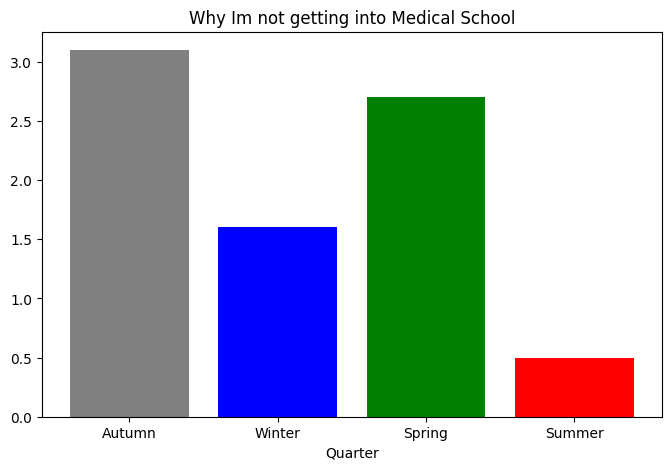

In [65]:
means_GPA = np.array([3.1, 1.6, 2.7, 0.5])

quarter = np.array(["Autumn", "Winter", "Spring", "Summer"])

plt.figure(figsize=(8, 5))  # Change the size of your plot by defining the width and height of the figure

plt.bar(
    x = quarter,            # x-axis
    height = means_GPA,      # y-axis
    color = ["gray", "blue", "green", "red"],
)

plt.xticks(quarter)         # Explicitly set x-tick labels
plt.xlabel("Quarter")       # Label for x-axis

plt.title('Why Im not getting into Medical School')

plt.show()                  # Always end with plt.show() to bring your figure to life

This is a great start but we are missing some elements of a good figure, lets start with somne error bars. Going back to the previous code and add the `yerr =` parameter to plt.bar to show the standard deviation as an error bar! Also add the `capsize =` parameter and choose an int of your choice until you find something you like!

x, height, and color are other parameters that we already setup, make sure to seperate them with commas!

Now lets add some finishing touches. Lets add some `plt.yticks([1, 2, 3])` at some important values, maybe just 0, 10, and 20 to make it look clean. Lets also add a descriptive y-axis label and finally a title with 'plt.title'

Lastly, my eyes hurt from looking at those colors. Can you pick some new colors out

<img src="https://matplotlib.org/stable/_images/sphx_glr_named_colors_003_2_00x.png" alt="Matplotlib Named Colors" width="500">

## Experiment 1b: 

The researchers were really interested in the anesthetic as it decreased the firing rate of the neuron. They went back into the lab and repeated this on 100 new neurons to see how consistently the anesthetic produced a firing rate of around 3.5 spikes/second. Here is the data from this experiment, where each column represents a single cell and each row represents 1 trial:

You don't need to worry about this code, just note that `data_1b` is the dataset you will be working with. 

In [66]:
# Generate dataset

np.random.seed(42)

# Generate a log-normal distribution (which is naturally right-skewed)
mu, sigma = 1, 0.1  # Initial guess for parameters

data_1b = np.random.lognormal(mean=mu, sigma=sigma, size=(20, 100))

min_val, max_val = 0, 32
data_1b = np.interp(data_1b, (data_1b.min(), data_1b.max()), (min_val, max_val))

# Adjust mean to be around 4.2
current_mean = np.mean(data_1b)
data_1b += (3.7 - current_mean)  # Shift the mean

# Ensure values remain within the specified range
data_1b = np.clip(data_1b, min_val, max_val)

Let's start by understanding the datase and the figure we want to create. Use your previous knowledge of numpy arrays to figure out the shape of the dataset and how we would want to average this to get the average firing rate across all trials for each of the 100 neurons.

Additionally, the researchers want you to represent this in a histogram with the average firing rate on the x axis, it may be helpful to get out the old pad and pen to sketch this out so you have a visual goal. Think about your axis labels and units!

In [67]:
print(data_1b.shape)
import numpy as np

avg_firing_rates = np.mean(data_1b, axis=0)
print(avg_firing_rates[:10])

(20, 100)
[4.63138784 3.91178347 4.42107008 4.29336542 3.21284808 2.98298351
 4.0381923  4.78225935 3.47515976 6.56113056]


Now that we have our dataset ready we need to think about how we are going to bin the neurons. There are three different methods we're going to over here, and it's up to you to pick your favoririte to apply to this experiment:

`num_bins = int` where we can set a variable equal to an intager number of bins and let matplotlib divide our data into that many bins automatically

`num_bins = [a, b, c, d, e, f, g...]` where each letter represents a float or int that defines the edges between bins, including the left edge of the first bin and the right edge of the last bin

`num_bins = np.arange(min, max, width)` is a hybrid method where you set the min edge (left edge of the first bin) and the max edge (right edge of the last bin) and decide the width of each bin

As a hint, all your data will be between 0-8 spikes per second.

In [68]:
num_bins = np.arange(0, 9, 1)

Great! Now we need to prepare our data for a histogram using numpy. We are going to define `counts` as the number of neurons that fall into each bin and `bins` as an array with the edges for each bin. 

Note: This second step is only necessary if your `num_bins` is an int and is not already an array with the bin edges. If you used method 2 or 3, you can run `counts = np.histogram()` on just the processed data

Replace the strings below with your variables!

In [69]:
counts, bins = np.histogram( 'average FR of each neuron' , bins = 'number of bins')

ValueError: 'number of bins' is not a valid estimator for `bins`

Ready to finally see something other than a code block? Let's plot this histogram:

If you did everything correctly up to this point, the code should run and plot your histogram, but you're work isn't done yet. We need to make some aesthetic choices. We definately need to add a title, x-axis label with units, and y-axis, label with units. You should also consider if you want to add or remove any ticks on either axis, or maybe we should revisit our binning method?

Finally, everyone's favorite part: add a parameter `color =` to `plt.hist` and get rid of the default blue color, we're more creative than that!

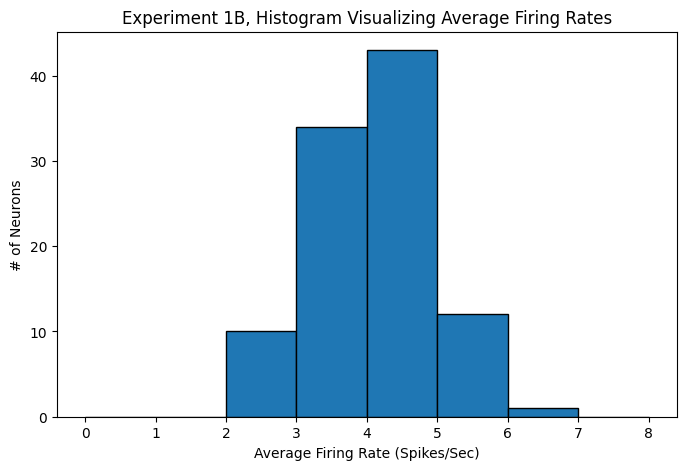

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

counts, bins = np.histogram(avg_firing_rates, bins=np.arange(0, 9, 1))


# Plot histogram
plt.figure(figsize=(8, 5))

plt.hist(bins[:-1],             # Define the left edge of each bin, we remove the final edge with [:-1] so the last edge (which is only a right edge) is removed
         bins,                  # All the bin edges
         weights=counts,        # This will set the height of each bin based on the counts you set earlier
         edgecolor= 'black'     # Set a border for each bin   
         )

plt.xlabel("Average Firing Rate (Spikes/Sec)")
plt.ylabel("# of Neurons")
plt.title("Experiment 1B, Histogram Visualizing Average Firing Rates")
plt.show()

## Experiment 2a: 

Great job working through experiment 1. Now it's time to work with some actual electrophysiology data recorded by Kyobi himself! First, take a minute to look through this data in LabChart Reader using the .adicht file. You should notice 2 different experiments, each with 5 subpages (individual trials) and one main page (the average of all 5 trials). Are you tired of taking screenshots of LabChart and making plots in excel? Me too! Let's take this one experiment at a time and process this data in Python!

The first step is getting the data into a form we can work with and importing the tools we need in python. Normally, you would go into LabChart and export as a .mat file, but we've already done this for you. We are going to import this into Python using the Neuroscience toolkit created by Jeremy Schroeter! Run the code block below to import this toolkit!

In [ ]:
import neuscitk as ntk

Now we are going to import our .mat file and organize the data. To do this we will convert out .mat file to a `LabChartDataset` using `ntk.LabChartDataset`. Please fill the string below with the pathname (location) of you .mat file!

	•	Windows: Hold Shift, right-click the file or folder, and select Copy as path.
	•	Mac: Right-click the file or folder, hold Option, and select Copy [name] as Pathname.

In [ ]:
dataset = ntk.LabChartDataset('/Users/alfredtan/Downloads/Snail_440_Demo.mat')   

Great! Now we need to split this dataset into the two experiments. The LabChartDataset actually ignores the averaged pages, so we will only have the 10 subpages total (page 0-9). Can you fill in the list below to organize the 10 pages into their propper experiments? That last line of code is going to organize what you set as `dataset` above into the 2 new pages you made.

In [ ]:
page_map = {
    'PulseTrials' : list(range(1,6)),
    'AdaptationTrials' : list(range(6,11)),
}

print("Page Map:", page_map)
print("Dataset Methods:", dir(dataset))

dataset.organize_by_pages(page_map)

Page Map: {'PulseTrials': [1, 2, 3, 4, 5], 'AdaptationTrials': [6, 7, 8, 9, 10]}
Dataset Methods: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_split_blocks', 'concat_blocks', 'data', 'fs', 'get_block', 'get_page', 'matlab_dict', 'n_channels', 'organize_by_pages', 'pages']


Our last step of prep is to get those pages into a dictionary that we know how to work with! I've done the first one for you, can you create the array for the second experiment?

In [ ]:
pulseTrials = dataset.get_page('PulseTrials')
adaptationTrials = dataset.get_page('AdaptationTrials')

Great, now we can ignore that second dictionary until we are ready to move on to experiment 2b. This next section will be all about the pulse trials.

Right now, `pulseTrials` has 5 blocks (block0 - block4), each with 2 channels (one for the electrical activity and one for the stimulus). 

Before we get into the trends, we want to show our lab report readers what our raw data looks like. Let's use `block0` as en example. Run the code below and see if it matches the first subpage in LabChart Reader!

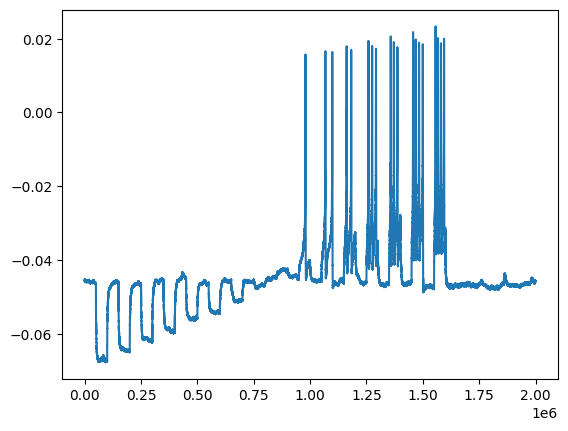

In [ ]:
plt.plot(pulseTrials['block_1'][0])

Let's break down that one line of code step by step. First of all, we are calling `plt.plot` on something, which tells matplot lib to make a plot of whatever is in the parenthesis.

Next, we defined that we are going to plot something from `pulseTrials`, specifically our first block `block0`

Finally, we defined that we want to plot channel 0, our electrical activity channel.

Now let's clean this up a little bit by adding axis titles and setting our axis scales and ticks to something more tangible. I even added a spot for you to set a new color and lidewidth!


We should get our x-axis into units of seconds (hint: right now it is in units of samples and we recorded at 100k samples/sec).

We should get our y-axis into untis of mV (hint: right now it is in units of Volts)

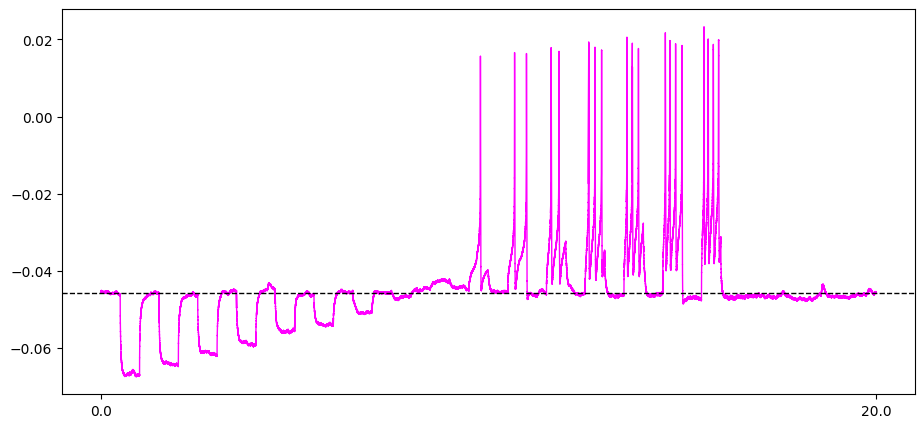

In [ ]:
SR = 100000

# Plotting
plt.figure(figsize=(11, 5))
plt.plot(pulseTrials['block_1'][0],
         color = 'magenta',
         linewidth = 1
         )

# x-Axis
xticks_samples = np.array([0, 2e6])
xticks_seconds = xticks_samples / SR
plt.xticks(xticks_samples,xticks_seconds) 


# y-Axis
baseline_mV = -45.8
baseline_V = baseline_mV / 1000
plt.axhline(y=baseline_V, color='black', linestyle='--', linewidth=1) # Notice hline is for a horizontal line!


Time for the finishing touches, let's add a title and lets at a horizontal line to visualize our baseline voltage (in mV) for good measure. You already know how to add a title but copy the code below to the previous code block to complete your plot!

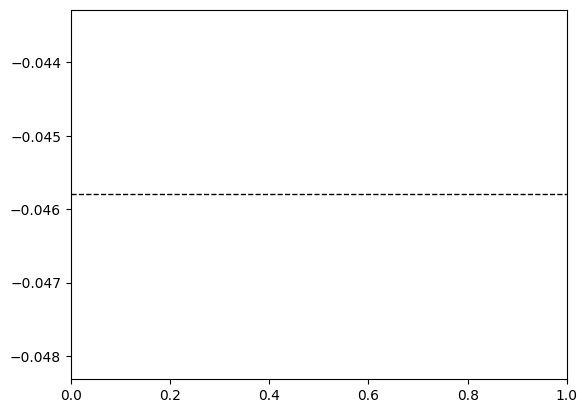

In [ ]:
baseline_mV = -45.8
baseline_V = baseline_mV / 1000
plt.axhline(y=baseline_V, color='black', linestyle='--', linewidth=1) # Notice hline is for a horizontal line!

Great, now its time for you to do it yourself, except this time we want to visualize the stimulus (hint: channel 1 instead of channel 0). In the code block below make a blot to visualize the stimulus!

In [ ]:
channel_1_data = data[:, 1]
time = np.linspace(0, len(channel_1_data) / sampling_rate, len(channel_1_data))

plt.figure(figsize=(8,4))
plt.plot(time, channel_1_data, color='magenta', linewidth=1)
plt.axhline(y=baseline_V, color='blue', linestyle='--', linewidth=1, label='Baseline')
plt.xlabel('Time in seconds')
plt.ylabel('Voltage')
plt.title("Channel 1 Stimulus")
plt.legend()
plt.show()


NameError: name 'sampling_rate' is not defined

Now as a neuroscientist, those plots you made are cool, but I want to see a specific action potential. Let's learn how to zoom in and focus on the last action potential of the biggest stimulus pulse. Use lab chart to find a window you want (and think about how you can get that into units of samples)

As always, make sure to consider axis, ticks, and a title!

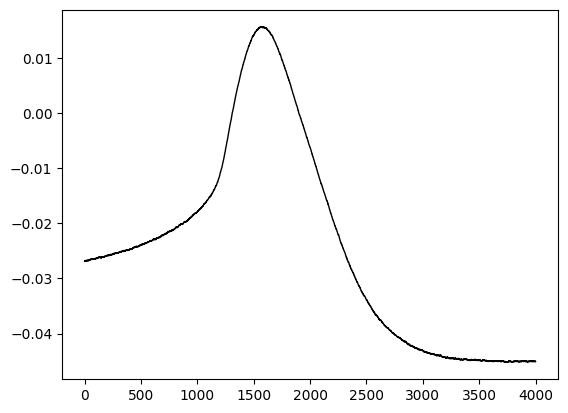

In [ ]:
window_start_s = 9.78
window_end_s = 9.82

window_start = int(window_start_s * SR)
window_end = int(window_end_s * SR)

plt.plot(pulseTrials['block_1'][0, window_start:window_end],
         color = 'black',
         linewidth = 1
         )

Now its up to you to do the same thing for the stimulus at that time point (Hint: it should be over the same window!)

Wow! We already have 4 Figures!

I know what you're thinking, that's a lot of work to organize in an image editor like powerpoint or photoshop, what if we could put them in a 2x2 grid here in python?

Well in fact there is, look through the example below and then see if you can recreate your four figures in a similar 2x2 grid in the blank code block below (hint: you already wrote the code for each figure!)

Note: indexes are generated (starting at 1) in the same order you would read a book (top left will be index 1 and bottom right will always be the last index)

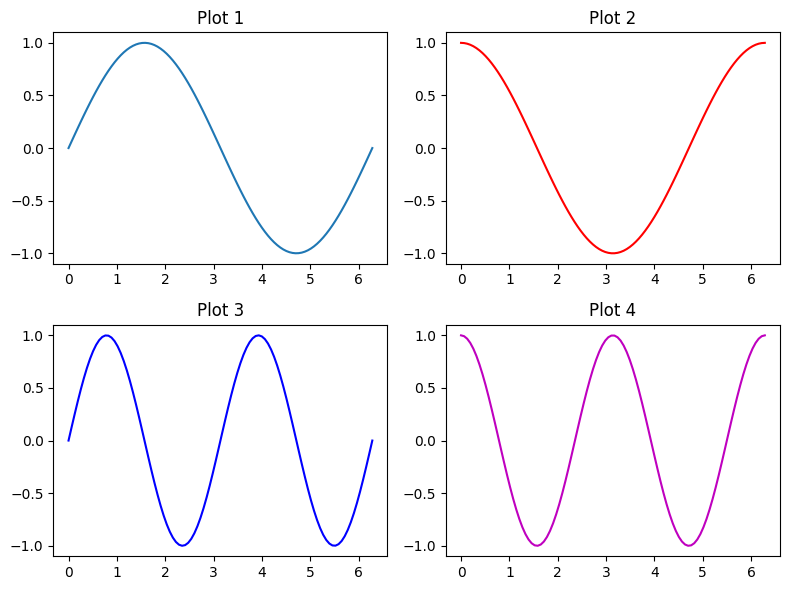

In [ ]:
# Example data
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(2*x)
y4 = np.cos(2*x)

# Create a 2x2 grid of subplots
plt.figure(figsize=(8, 6))

# First subplot
plt.subplot(2, 2, 1)  # (rows, cols, index)
plt.plot(x, y1, label="sin(x)")
plt.title("Plot 1")

# Second subplot
plt.subplot(2, 2, 2)
plt.plot(x, y2, color="r")
plt.title("Plot 2")

# Third subplot
plt.subplot(2, 2, 3)
plt.plot(x, y3, color="b")
plt.title("Plot 3")

# Fourth subplot
plt.subplot(2, 2, 4)
plt.plot(x, y4, color="m")
plt.title("Plot 4")

# Adjust layout to prevent overlap (you should always do this for figures with subplots!)
plt.tight_layout()

# Show the plot
plt.show()

Alright, the raw data looks good but we didn't come this far just to look at action potential waveforms, let's dig into the trends with some more advanced analysis! Don't worry, this is a visualization notebook, not a data analysis notebook. Just run the next few code blocks and I'll do the dirty work for you. We'll be learning how to do this all very soon using the neuroscience toolkit.

Note: Read the comments at the top of each block to understand the overview of what analysis is being done! THIS IS IMPORTANT!

In [ ]:
# define a function to detect spikes and find the time at which their peak occurs

def detect_spikes(voltage_array, fs=100000, window=0.05, refractory=0.1):
    """
    Detects spikes in a voltage signal, centering on local maxima and ignoring duplicates within 0.1s.

    Parameters:
        voltage_array (numpy array): 1D array of voltage values.
        fs (int): Sampling rate (default: 100,000 Hz).
        window (float): Time window for local max search (default: 0.05 sec).
        refractory (float): Time to ignore other spikes after detection (default: 0.1 sec).
    
    Returns:
        spike_indices (list): Indices of detected spikes centered on local max.
    """
    window_samples = int(window * fs)  # Convert 0.05 sec to samples (5000)
    refractory_samples = int(refractory * fs)  # Convert 0.1 sec to samples (10,000)
    spike_indices = []

    # Detect initial threshold crossings
    spike_candidates = np.where(voltage_array > 0)[0]

    if len(spike_candidates) == 0:
        return []  # No spikes detected

    last_spike = -refractory_samples  # Ensures first spike is not skipped

    for spike in spike_candidates:
        if spike - last_spike < refractory_samples:
            continue  # Skip spikes within the 0.1 sec refractory period

        # Define search range for local max
        start = max(0, spike - window_samples)
        end = min(len(voltage_array), spike + window_samples)

        # Find local max within the window
        local_max_index = start + np.argmax(voltage_array[start:end])

        # Store the refined spike index
        spike_indices.append(local_max_index)
        last_spike = local_max_index  # Update last detected spike

    return spike_indices


In [ ]:
# Gets an array of all the times at which a spike occurs across all the blocks

spike_times_all = []

for block in pulseTrials:
    data = pulseTrials[str(block)]
    spike_indices = np.array(detect_spikes(data[0]))
    spike_times = spike_indices / SR
    spike_times_all.extend(spike_times)

spike_times_all = np.sort(np.array(spike_times_all))


In [ ]:
# Creates an array with the voltage of each pulse and array of the number of average spikes per pulse

pulse_voltages = np.array([-25, -20, -17, -14, -11, -8, -5, -1, 2, 5, 8, 11, 14, 17, 20, 25])

bin_size = 0.5  # Half-second bins
start_time = 0  
end_time = 16
bins = np.arange(start_time, end_time + bin_size, bin_size)  # Create bin edges

# Bin the spike times
counts, bin_edges = np.histogram(spike_times_all, bins=bins)

# Remove every other bin (starting with the first)
spike_counts = counts[1::2]  # Take every other count, starting from index 1
average_spike_count = spike_counts / 5 # Divide by 5 blocks to get average spikes per block for each pulse

We now have two arrays: They both have a length of 16 for each of the 16 pulses (including the negative pulses)

`pulse_voltages` is a 1 dimensional array with all of the voltages of each pulse

`average_spike_count` is a 1 dimensional array with the number of spikes for each pulse

Let's plot this data as a scatter plot with pulse voltage on the x-axis and average number of spikes on the y-axis. I have faith that you can do this one yourself! In the simplest form, use `plt.scatter(x,y)` where x and y are the arrays for that axis, but you should add other parameters such as:
1. color
2. alpha (transparency where alpha should be set between 0 and 1)
3. marker (im tired of circles too! here's a list to try ['.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'])

Dont forget the axis, ticks, and title (beware of any unit conversions you may need!)

In [ ]:





plt.show()

## Experiment 2b: 

Look at you go, you just made a plot from an empty code block! It's now time for out last adventure, the adaptation trials. I'm going to let you take the reigns on this one, but i'll be here to do the data analysis for the final figure (foreshadowing, it's a line plot). Start by making a figure with the electrical raw data from 0-12 seconds on the first subpage of the adaptation trials (Hint: it's `block_5`).

Remember to `plt.show()` at the end!

Dont forget the axis, ticks, and title (beware of any unit conversions you may need!)

In [72]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0, 12, num=1200)
electrical_data = block_5[:, 0]

plt.figure(figsize=(8, 4))
plt.plot(time, electrical_data, color='black', linewidth=1)
plt.xlabel('Time in seconds')
plt.ylabel('Voltage')
plt.title('Electrical activity in the first 12 sec')
plt.show()

NameError: name 'block_5' is not defined

Next up is the raw data for the stimulus at this same time interval on the same subpage! You've got this!

Dont forget the axis, ticks, and title (beware of any unit conversions you may need!)

In [73]:
stimulus_data = block_5[:, 1]

plt.figure(figsize=(8, 4))
plt.plot(time, stimulus_data, color='red', linewidth=1)
plt.xlabel('Time in seconds')
plt.ylabel('Stimulus type')
plt.title('Stimulus Data for the first 12 sec')
plt.show()

NameError: name 'block_5' is not defined

Next, let's turn this into a 1x2 plot using `plt.subplot` with the electical activity on top and the stimulus on the bottom!

Can you guess what i'm going to say next?
"Dont forget the axis, ticks, and title (beware of any unit conversions you may need!)"

For this one though, i'm throwing you a curve ball! Instead of adding a title for each subplot, let's use `plt.suptitle('Title')` to make one title for the whole plot! This looks much cleaner!

Ok that was a lot, let me take over and do some quick data analysis while you take a breather, then we're going to plot the relationship between time under stimulus and action potential firing rate!

Make sure to read the comments at the top of each cell to get an overview of the analysis!

In [74]:
# Gets an array of all the times at which a spike occurs across all the blocks

all_adaptation_spikes = []

for block in adaptationTrials:
    data = adaptationTrials[str(block)]
    spike_indices = np.array(detect_spikes(data[0]))
    spike_times = spike_indices / SR
    all_adaptation_spikes.extend(spike_times)

all_adaptation_spikes = np.sort(np.array(all_adaptation_spikes))

In [75]:
# Creates an array with the midpoint of each pulse and array of the number of the firing rate per bin

bin_midpoints = np.arange(1.5, 11, 1)

bin_size = 1  # 1-second bins
start_time = 1
end_time = 11
bins = np.arange(start_time, end_time + bin_size, bin_size)  # Create bin edges

# Bin the spike times
adaptation_counts, bin_edges = np.histogram(all_adaptation_spikes, bins=bins)
adaption_FR = adaptation_counts / 5 # Divide by 5 blocks and by 1 second to get average spikes/sec for each of the 5 blocks

We again have two arrays: They both have a length of 10 for each of the 1 second bins we made!

`bin_midpoints` is a 1 dimensional array with the midpoints of each bin (in units of s)

`adaption_FR` is a 1 dimensional array with the average FR for each bin

Let's plot this data as a lineplot so we can observe if the cell adapts over time to decrease it's firing rate under constant current stimulus. In its simplest form, use `plt.plot(x,y)`, but explore these parameters too!
1. color
2. linestyle (see below)
2. linewidth

Dont forget the axis, ticks, and title (beware of any unit conversions you may need!)

<img src="https://matplotlib.org/stable/_images/sphx_glr_linestyles_001_2_00x.png" alt="Matplotlib Named Colors" width="500">

In [ ]:




plt.show()

Great job! I'm really impressed by your work, but unfortunately Kyobi is not (tragic). He says you should go back into lab to get more trials for a bigger sample size, but you don't want to do that!

Instead, you ask your wonderful PFs for their data, and they happily give it to you in the code block below!

In [76]:
Srinidhi_FR = np.array([8.38, 4.57, 1.45, 1.73, 1.99, 1.95, 2.18, 0.79, 0, 0])
Pascha_FR = np.array([6.92, 7.37, 2.56, 1.56, 1.74, 1.57, 2.15, 0.41, 1.11, 0])
Mason_FR = np.array([7.68, 5.14, 2.59, 0.86, 1.12, 1.66, 2.17, 1.59, 0, 0])
Collin_FR = np.array([6.93, 6.56, 3.74, 1.91, 2.35, 2.08, 2.35, 1.77, 0.51, 0])
Preston_FR = np.array([7.23, 3.61, 1.24, 2.41, 1.97, 2.08, 2.75, 0.68, 0, 0.43])

Of course, we could do this in 6 subplots, but thats a lot of work for a cluttered figure, instead let's put them all on the same plot. Copy your code to the empty cell below and see what happens!

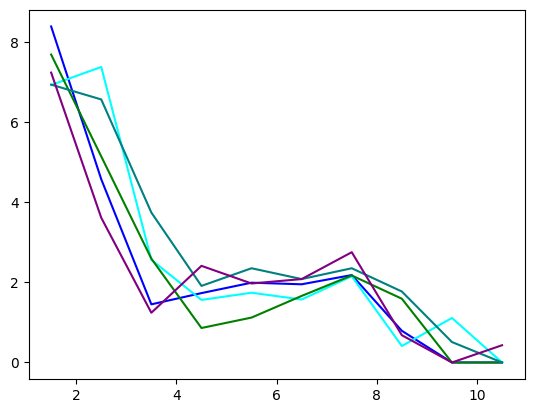

In [78]:
plt.plot(bin_midpoints, Srinidhi_FR, color='blue', label='Srinidhi')
plt.plot(bin_midpoints, Pascha_FR, color='cyan', label='Pascha')
plt.plot(bin_midpoints, Mason_FR, color='green', label='Mason')
plt.plot(bin_midpoints, Collin_FR, color='teal', label='Collin')
plt.plot(bin_midpoints, Preston_FR, color='purple', label='Preston')

plt.show()

Did you notice how each also had a parameter called `label`? Try adding a label to your code as well and also add the line `plt.legend()` right before `plt.show`! This will make it easier to tell whose data is whose!

Add any finishing touches and your work here is done! We've been through a lot, give yourself a pat on the back!